In [1]:
###import necessary libraries

import nltk                                               #natural language kit
import pandas as pd                                       #for dataframe
import numpy as np                                        #matrix operations

from keras.preprocessing.text import Tokenizer            #for making bag of words
tokenizer = Tokenizer()
lemmatizer = WordNetLemmatizer()

import matplotlib.pyplot as plt                           #for graph plot
%matplotlib inline 
import seaborn as sns

Using TensorFlow backend.


In [38]:
#loading training dataset
df_train = pd.read_csv('train.csv')

In [ ]:
df_train['job_type'] = df_train['job_type'].astype('category')
df_train['category'] = df_train['category'].astype('category')

In [ ]:
#stastical analysis
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.show()

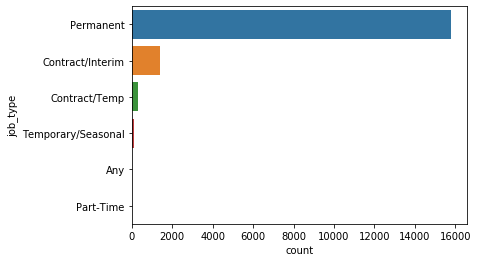

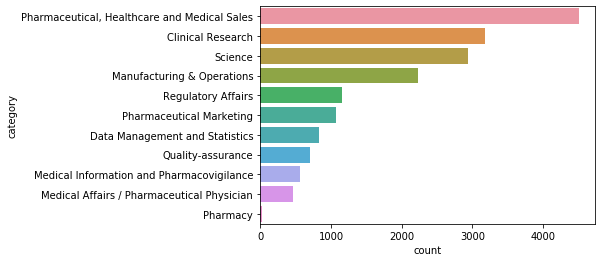

In [ ]:
#target non english string
string = df['job_description'][140]
string

'HEOR, Market Access, Real World Data Consultant - ¡Estocolmo, CRO estable!\r\r\r\nEstamos buscando un Consultor experimentado y apasionado con experiencia en acceso a mercados, economía de la salud y / o análisis de datos del mundo real. La gestión exitosa de los proyectos, la gestión continua de las relaciones con los clientes existentes y la generación de nuevos clientes son esenciales para el crecimiento y la prosperidad de la empresa. Se espera que el candidato desempeñe un papel fundamental en el desarrollo y la dirección constantes de las operaciones en los países nórdicos, y se le alienta a que traiga consigo ideas y aspiraciones para impulsar el negocio.\r\r\r\nTÍTULO PROFESIONAL\r\r\r\nConsultor / Consultor Senior - Acceso al mercado, Economía de la salud, RWD\r\r\r\nUBICACIÓN\r\r\r\nÁrea de Estocolmo - Oficina basada principalmente\r\r\r\nBENEFICIOS\r\r\r\nGeneroso salario + paquete completo de beneficios\r\r\r\nOportunidades continuas de desarrollo profesional\r\r\r\nEntrenamientos internos\r\r\r\n30 días de vacaciones\r\r\r\nPaquete relacionado con el rendimiento\r\r\r\nDESCRIPCIÓN DEL PAPEL\r\r\r\nProporcionar un alto nivel de gestión de relaciones y enlace con los clientes existentes\r\r\r\n* Diseñar los alcances del proyecto, los planes y los resultados y obtener un acuerdo para estos del cliente.\r\r\r\n* Gestión del proyecto de los equipos dentro de la empresa y tiene la responsabilidad final de los plazos y la calidad de los trabajos finalizados / entregados\r\r\r\n* Asegurar que todo el personal bajo su guía sea adecuadamente apoyado, motivado y dirigido\r\r\r\n* Comunicación de los principales productos del proyecto a los contactos clave del cliente\r\r\r\nREQUISITOS\r\r\r\n* Un alto grado de comprensión de los sistemas de atención de la salud en los países nórdicos y las agencias internacionales de salud y su interacción con la industria farmacéutica, de dispositivos médicos y de biotecnología.\r\r\r\n* Experiencia documentada y conocimiento de trabajar con funciones globales en la industria de la salud\r\r\r\n* Fuerte consultoría de venta y negociación de habilidades\r\r\r\n* Inglés fluido, idioma adicional será una ventaja\r\r\r\n* Buenas habilidades de presentación\r\r\r\n* Fuertes atributos de gestión de proyectos\r\r\r\n* Buenas habilidades de supervisión\r\r\r\n* Capacidad para dirigir / dirigir reuniones con representantes de clientes senior\r\r\r\n* Un alto grado de precisión escrita y atención a los detalles\r\r\r\n* Habilidades de comunicación excepcionales, especialmente en la transmisión de información técnica y conceptos de proyectos.\r\r\r\n* Flexible, determinado y motivado\r\r\r\nACERCA DE i-PHARM CONSULTING\r\r\r\ni-Pharm Consulting es una empresa de reclutamiento especializada que presta servicios farmacéuticos en todo el mundo. Proporcionamos personal permanente y contratado a una amplia gama de organizaciones farmacéuticas, de dispositivos médicos, de biotecnología y de investigación por contrato (CRO, por sus siglas en inglés). i-Pharm tiene experiencia específica en investigación clínica, asuntos médicos, asuntos regulatorios, farmacovigilancia, garantía de calidad y bioinformática.\r\r\r\nAPLICAR\r\r\r\nSi desea analizar esta vacante aún más, comuníquese con el asesor, Jan Zachnik. Si este rol no es adecuado, Jan también está disponible para analizar otros posibles puestos o responder preguntas generales sobre su carrera y el mercado actual.\r\r\r\nAplica ya\r\r\r\nNúmero de referencia: 205276-JZ3091'

In [ ]:
#translate using goslate
import goslate
gs = goslate.Goslate()
translatedText = gs.translate(string,'en')
translatedText

'HEOR, Market Access, Real World Data Consultant - Stockholm, stable CRO!\r\r\r\nWe are seeking an experienced and passionate consultant with experience in market access, health economics and / or analysis of data from the real world. Successful project management, continuous management of relationships with existing customers and generating new customers are essential for growth and prosperity of the company. The candidate is expected to play a key role in the continued development and management of operations in the Nordic countries, and are encouraged to bring with them ideas and aspirations to drive business.\r\r\r\nJOB TITLE\r\r\r\nConsultant / Senior Consultant - Market Access, Health Economics, RWD\r\r\r\nLOCATION\r\r\r\nStockholm area - mainly based Office\r\r\r\nBENEFITS\r\r\r\nGenerous salary + comprehensive benefits package\r\r\r\ncontinuous professional development opportunities\r\r\r\ninternal training\r\r\r\n30 days holiday\r\r\r\nPerformance-related package\r\r\r\nDESCRIPTION OF THE PAPER\r\r\r\nProvide a high level of relationship management and liaison with existing customers\r\r\r\n* Designing the scope of the project, plans and results and obtain agreement from the client for these.* Manage project teams within the company and has the ultimate responsibility for the timeliness and quality of completed works / delivered\r\r\r\n* Ensure that all personnel under his guidance is adequately supported, motivated and directed\r\r\r\n* Communication of the main products of the project to key client contacts\r\r\r\nREQUIREMENTS\r\r\r\n* A high degree of understanding of systems of health care in the Nordic countries and international health agencies and their interaction with the pharmaceutical industry, medical device and biotechnology.\r\r\r\n* Documented experience and knowledge of working with global functions in the healthcare industry\r\r\r\n* Strong sales consulting and negotiation skills\r\r\r\n* Fluent English, additional languages \u200b\u200bwill be an advantage\r\r\r\n* Good presentation skills\r\r\r\n* Strong project management attributes\r\r\r\n* Good supervisory skills\r\r\r\n* Ability to lead / lead meetings with senior representatives of clients\r\r\r\n* A high degree of accuracy written and attention to detail\r\r\r\n* Exceptional communication skills, especially in the transmission of technical information and project concepts.\r\r\r\n* Flexible, determined and motivated\r\r\r\nABOUT i-PHARM CONSULTING\r\r\r\ni-Pharm Consulting is a specialist recruitment company providing pharmaceutical services worldwide.We provide permanent and contracted staff a wide range of pharmaceutical, medical device, biotechnology and contract research (CRO acronym). i-Pharm has specific expertise in clinical research, medical affairs, regulatory affairs, pharmacovigilance, quality assurance and bioinformatics.\r\r\r\nAPPLY\r\r\r\nIf you want to discuss this vacancy further, contact the advisor, Jan Zachnik. If this role is not suitable, Jan is also available to discuss other possible positions or answer general questions about his career and the current market.\r\r\r\napply now\r\r\r\nReference Number: 205276-JZ3091'

In [ ]:
#translate using translator
from translate import Translator 
translator= Translator(to_lang="English")
translation = translator.translate(string)
translation

'QUERY LENGTH LIMIT EXCEDEED. MAX ALLOWED QUERY : 500 CHARS QUERY LENGTH LIMIT EXCEDEED. MAX ALLOWED QUERY : 500 CHARS QUERY LENGTH LIMIT EXCEDEED. MAX ALLOWED QUERY : 500 CHARS QUERY LENGTH LIMIT EXCEDEED. MAX ALLOWED QUERY : 500 CHARS your CV. Alternatively call the recruitment team at Chemistree Solutions Ltd. Chemistree is a pharmaceutical and healthcare recruitment specialist.\r\r\r\nApply Now\r\r\r\nRef no: 138060-3787A1\r\r\r\nThis vacancy is being advertised by Chemistree Solutions Limited. The services advertised by Chemistree Solutions Limited are those of an Employment Agency.'

In [ ]:
#translate using textblob
from textblob import TextBlob
hi_blob = TextBlob(string)
if(hi_blob.detect_language() != 'es'):
    x = hi_blob.translate(to='en')
str(x)

'HEOR, Market Access, Real World Data Consultant - Stockholm, stable CRO!\r\r\r\nWe are seeking an experienced and passionate Consultant with experience in market access, health economics and / or real-world data analysis. Successful project management, ongoing management of relationships with existing clients, and generating new clients are essential to the growth and prosperity of the company. The candidate is expected to play a critical role in the continued development and direction of operations in the Nordic countries, and he is encouraged to bring with him ideas and aspirations to drive the business forward.\r\r\r\nJOB TITLE\r\r\r\nConsultant / Senior Consultant - Market Access, Health Economics, RWD\r\r\r\nLOCATION\r\r\r\nStockholm Area - Office based mainly\r\r\r\nBENEFITS\r\r\r\nGenerous salary + full benefits package\r\r\r\nOngoing professional development opportunities\r\r\r\nInternal training\r\r\r\n30 days of vacation\r\r\r\nPerformance related package\r\r\r\nPAPER DESCRIPTION\r\r\r\nProvide a high level of relationship management and liaison with existing customers\r\r\r\n* Design the scope of the project, the plans and the results and obtain an agreement for these from the client.\r\r\r\n* Project management of the teams within the company and has the final responsibility for the deadlines and the quality of the finished / delivered works\r\r\r\n* Ensure that all staff under your guidance are adequately supported, motivated, and directed\r\r\r\n* Communication of the main project products to key customer contacts\r\r\r\nREQUIREMENTS\r\r\r\n* A high degree of understanding of health care systems in the Nordic countries and international health agencies and their interaction with the pharmaceutical, medical device and biotechnology industries.\r\r\r\n* Documented experience and knowledge of working with global roles in the healthcare industry\r\r\r\n* Strong sales consulting and skills negotiation\r\r\r\n* Fluent English, additional language will be an advantage\r\r\r\n* Good presentation skills\r\r\r\n* Strong project management attributes\r\r\r\n* Good supervisory skills\r\r\r\n* Ability to lead / lead meetings with senior customer representatives\r\r\r\n* A high degree of written precision and attention to detail\r\r\r\n* Exceptional communication skills, especially in the transmission of technical information and project concepts.\r\r\r\n* Flexible, determined and motivated\r\r\r\nABOUT i-PHARM CONSULTING\r\r\r\ni-Pharm Consulting is a specialized recruiting company that provides pharmaceutical services worldwide. We provide permanent, contract staff to a wide range of Pharmaceutical, Medical Device, Biotechnology, and Contract Research (CRO) organizations. i-Pharm has specific experience in clinical research, medical affairs, regulatory affairs, pharmacovigilance, quality assurance, and bioinformatics.\r\r\r\nAPPLY\r\r\r\nIf you would like to further explore this vacancy, please contact the advisor, Jan Zachnik. If this role is inappropriate, Jan is also available to discuss other possible positions or answer general questions about your career and the current market.\r\r\r\nApply now\r\r\r\nReference number: 205276-JZ3091'

In [3]:
#preprocessing of training data

train = []
for i in range (0, len(df_train['job_description'])):
    string = df_train['job_description'][i]  #selecting individual 
    smod = string.replace('\r\r\r\n', ' ')   #eliminating unrequired symbols
    smod = smod.lower()   #converting all letters to lower case
    head, sep, tail = smod.partition('apply now')   #removing th esubstring apply now and the remaning part
    whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')  #extracting only alphabets
    answer = ''.join(filter(whitelist.__contains__, head)) 
    words = nltk.word_tokenize(answer)  #tokenizing our filtered string
    tags = nltk.pos_tag(words)    #parts of speech tagging
    nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')] #extraction of key words
    lemmatized_output = [lemmatizer.lemmatize(w) for w in nouns] #lemmatizing our tokens
    train.append(lemmatized_output)  #appending our token list

In [5]:
#creating a list of string by joining tokens
train_mod = []
for i in range(0, len(train)):
    train_mod.append(' '.join(train[i]))

In [ ]:
#saving our preprocessed data
df = pd.DataFrame(train_mod)
df.to_csv('train_mod.csv')

In [8]:
#bag of words
tokenizer.fit_on_texts(train_mod)

#training vector
vectors = tokenizer.texts_to_matrix(train_mod, mode='count')

In [49]:
#loading test dataset
df_test = pd.read_csv('test.csv')

In [18]:
#preprocessing test dataset and making test vector
test = []
for i in range (0, len(df_test['job_description'])):
    string = df_test['job_description'][i]
    smod = string.replace('\r\r\r\n', ' ')
    smod = smod.lower()
    head, sep, tail = smod.partition('apply now')
    whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    answer = ''.join(filter(whitelist.__contains__, head))
    words = nltk.word_tokenize(answer)
    tags = nltk.pos_tag(words)
    nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
    lemmatized_output = [lemmatizer.lemmatize(w) for w in nouns]
    test.append(lemmatized_output)

test_mod = []
for i in range(0, len(test)):
    test_mod.append(' '.join(test[i]))
    
df = pd.DataFrame(train_mod)
df.to_csv('test_mod.csv')

vectors_test = tokenizer.texts_to_matrix(test_mod, mode='count')

In [53]:
#results for training dataset
test_cat = df_train['category'].to_numpy()
test_type =  df_train['job_type'].to_numpy()

In [32]:
#model training using knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
model.fit(vectors, test_cat)
x = model.predict(vectors_test)
x

array(['Permanent', 'Permanent', 'Permanent', ..., 'Temporary/Seasonal',
       'Permanent', 'Permanent'], dtype=object)

In [ ]:
#predicting results
model = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
model.fit(vectors, test_type)
y = model.predict(vectors_test)

In [ ]:
#saving our results
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)
df_x.to_csv('cat_col.csv')
df_y.to_csv('type_col.csv')

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [39]:
df_train['category'] = le.fit_transform(df_train['category']) #encoding data for model training in random forest
#df_train['job_type'] = le.fit_transform(df_train['job_type'])

In [ ]:
test_cat = df_train['category'].to_numpy()

In [14]:
#model training using random forest
rf.fit(vectors, test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [15]:
#saving our trained model
from sklearn.externals import joblib 
joblib.dump(rf, 'rand.pkl') 

/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['rand.pkl']

In [21]:
#predicting results
predictions = rf.predict(vectors_test)

In [23]:
#inversing our coding to get required results
pred = np.around(predictions)
pred = pred.astype(int)
pred = le.inverse_transform(pred)

In [41]:
pred

array(['Medical Affairs / Pharmaceutical Physician',
       'Pharmaceutical, Healthcare and Medical Sales',
       'Pharmaceutical, Healthcare and Medical Sales', ...,
       'Pharmaceutical, Healthcare and Medical Sales',
       'Pharmaceutical Marketing',
       'Pharmaceutical, Healthcare and Medical Sales'], dtype=object)

In [ ]:
df = pd.DataFrame(pred)
df.to_csv('samp.csv')

In [ ]:
#model training using svm
from sklearn import svm
model1 = svm.SVC()
model1.fit(vectors, test_cat)

In [ ]:
#saving our svm model pkl form
joblib.dump(model1, 'svc.pkl') 

In [ ]:
#predicting results
prediction = model1.predict(vectors_test)